In [ ]:
%pip install superlinked

## Data retrival

We are going to use direct calls instead of wrapper for a reason that wrapper works way to long. Let us see what data can we retrieve from PokeApi

In [186]:
import requests as req

POKEAPI = 'http://pokeapi.co/api/v2'
endpoints = req.get(POKEAPI).json()
f"{len(endpoints)} endpoints available."

'48 endpoints available.'

In [187]:
endpoints

{'ability': 'https://pokeapi.co/api/v2/ability/',
 'berry': 'https://pokeapi.co/api/v2/berry/',
 'berry-firmness': 'https://pokeapi.co/api/v2/berry-firmness/',
 'berry-flavor': 'https://pokeapi.co/api/v2/berry-flavor/',
 'characteristic': 'https://pokeapi.co/api/v2/characteristic/',
 'contest-effect': 'https://pokeapi.co/api/v2/contest-effect/',
 'contest-type': 'https://pokeapi.co/api/v2/contest-type/',
 'egg-group': 'https://pokeapi.co/api/v2/egg-group/',
 'encounter-condition': 'https://pokeapi.co/api/v2/encounter-condition/',
 'encounter-condition-value': 'https://pokeapi.co/api/v2/encounter-condition-value/',
 'encounter-method': 'https://pokeapi.co/api/v2/encounter-method/',
 'evolution-chain': 'https://pokeapi.co/api/v2/evolution-chain/',
 'evolution-trigger': 'https://pokeapi.co/api/v2/evolution-trigger/',
 'gender': 'https://pokeapi.co/api/v2/gender/',
 'generation': 'https://pokeapi.co/api/v2/generation/',
 'growth-rate': 'https://pokeapi.co/api/v2/growth-rate/',
 'item': 'ht

What we need is complete list of pokemons. It can be found at https://pokeapi.co/api/v2/pokemon/

In [188]:
pokemon_general_info = req.get(f"{endpoints['pokemon']}?offset=0&limit={5000}").json()['results']
pokemon_species_info = req.get(f"{endpoints['pokemon-species']}?offset=0&limit={5000}").json()['results']

Let us get total number of pokemons we would be able to look for

In [189]:
n = min(len(pokemon_general_info), len(pokemon_species_info))
n

1025

Now we are to write a function that gets us a pokemon with provided id (Pikachu is 25)

In [ ]:
def get_data(id):
    pokemon_g = pokemon_general_info[id-1]
    pokemon_s = pokemon_species_info[id-1]

    data = req.get(pokemon_g['url']).json()
    name = pokemon_g['name']
    abilities = [i['ability']['name'] for i in data['abilities']]
    height = data['height']
    weight = data['weight']
    sprite = data['sprites']['front_default']

    species = req.get(pokemon_s['url']).json()
    try: 
        shape = species['shape']['name']
    except:
        shape = None
    try:
        color = species['color']['name']
    except:
        color = None
    try:
        habitat = species['habitat']['name']
    except:
        habitat = None
    try:
        capture_chance = round(species['capture_rate']/255,2)
    except:
        capture_chance = None
    return {'id': id, 'name': name, 'abilities': abilities, 
            'color': color, 'shape' : shape, 'habitat': habitat, 'capture_chance': capture_chance,
            'height': height,'weight': weight,
            'sprite': sprite}

In [ ]:
get_data(25)

Final step is to save it into csv table

In [ ]:
import pandas as pd

pokedex_list = [get_data(i) for i in range(1, n+1)]
pokedex_df = pd.DataFrame(pokedex_list)
pokedex_df.to_csv('data/pokedex.csv')

## Data Analysis time!

In [210]:
pokedex_df = pd.read_csv('data/pokedex.csv')

In [211]:
pokedex_df = pokedex_df.drop(columns=['Unnamed: 0'])

In [212]:
pokedex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1025 non-null   int64  
 1   name            1025 non-null   object 
 2   abilities       1025 non-null   object 
 3   color           1025 non-null   object 
 4   shape           905 non-null    object 
 5   habitat         386 non-null    object 
 6   capture_chance  1025 non-null   float64
 7   height          1025 non-null   int64  
 8   weight          1025 non-null   int64  
 9   sprite          1025 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 80.2+ KB


In [246]:
pokedex_df = pokedex_df.dropna()

In [241]:
%matplotlib inline

<Axes: xlabel='color'>

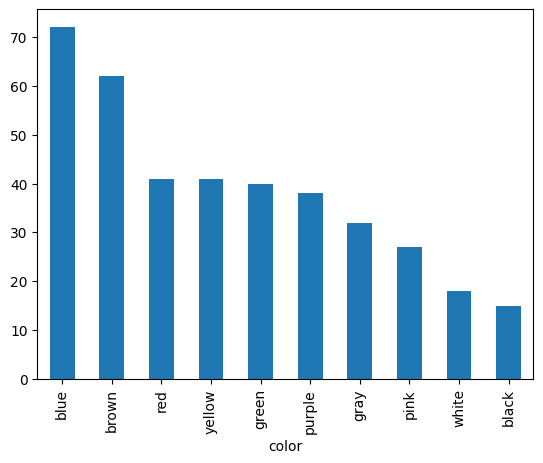

In [247]:
pokedex_df['color'].value_counts().plot.bar()

<Axes: xlabel='shape'>

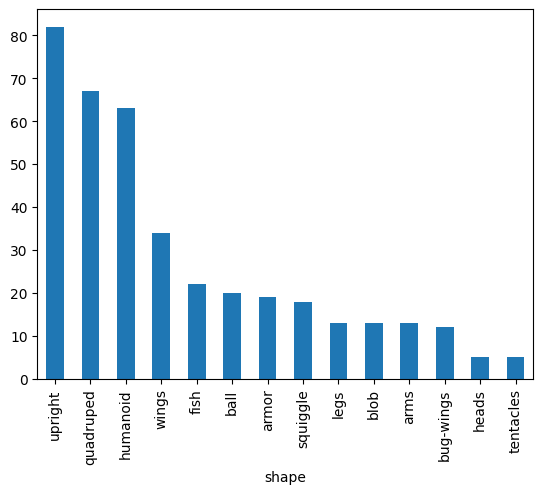

In [248]:
pokedex_df['shape'].value_counts().plot.bar()

<Axes: xlabel='habitat'>

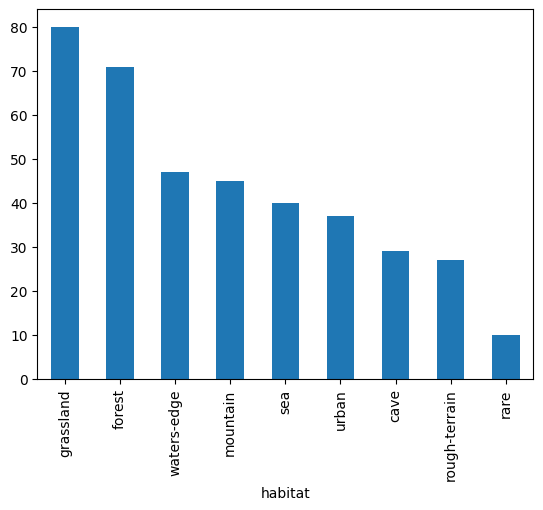

In [249]:
pokedex_df['habitat'].value_counts().plot.bar()

In [269]:
from IPython.display import Image

The biggest pokemon 

In [261]:
max_height = pokedex_df['height'].max()
pokedex_df.query(f'height == {max_height}')

,id,name,abilities,color,shape,habitat,capture_chance,height,weight,sprite
320,321,wailord,"['water-veil', 'oblivious', 'pressure']",blue,fish,sea,0.24,145,3980,https://raw.githubusercontent.com/PokeAPI/spri...


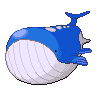

In [270]:
Image(pokedex_df.at[320, 'sprite'])

The heaviest pokemon 

In [265]:
max_weight = pokedex_df['weight'].max()
pokedex_df.query(f'weight == {max_weight}')

,id,name,abilities,color,shape,habitat,capture_chance,height,weight,sprite
382,383,groudon,['drought'],red,upright,rough-terrain,0.01,35,9500,https://raw.githubusercontent.com/PokeAPI/spri...


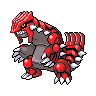

In [271]:
Image(pokedex_df.at[382, 'sprite'])

Smalest pokemons

In [279]:
min_height = pokedex_df['height'].min()
pokedex_df.query(f'height == {min_height}')

,id,name,abilities,color,shape,habitat,capture_chance,height,weight,sprite
49,50,diglett,"['sand-veil', 'arena-trap', 'sand-force']",brown,blob,cave,1.00,2,8,https://raw.githubusercontent.com/PokeAPI/spri...
176,177,natu,"['synchronize', 'early-bird', 'magic-bounce']",green,wings,forest,0.75,2,20,https://raw.githubusercontent.com/PokeAPI/spri...
297,298,azurill,"['thick-fat', 'huge-power', 'sap-sipper']",blue,legs,waters-edge,0.59,2,20,https://raw.githubusercontent.com/PokeAPI/spri...


Lightest pokemons

In [280]:
min_weight = pokedex_df['weight'].min()
pokedex_df.query(f'weight == {min_weight}')

,id,name,abilities,color,shape,habitat,capture_chance,height,weight,sprite
91,92,gastly,['levitate'],purple,ball,cave,0.75,13,1,https://raw.githubusercontent.com/PokeAPI/spri...
92,93,haunter,['levitate'],purple,arms,cave,0.35,16,1,https://raw.githubusercontent.com/PokeAPI/spri...


Hardest to catch pokemons

In [ ]:
source: InMemorySource = InMemorySource(pokemon, parser=df_parser)
executor: InMemoryExecutor = InMemoryExecutor(
    sources=[source], indices=[poke_index]
)
app: InMemoryApp = executor.run()
source.put([pokedex_df])

In [276]:
lowest_capture_chance = pokedex_df['capture_chance'].min()
pokedex_df.query(f'capture_chance == {lowest_capture_chance}')

,id,name,abilities,color,shape,habitat,capture_chance,height,weight,sprite
143,144,articuno,"['pressure', 'snow-cloak']",blue,wings,rare,0.01,17,554,https://raw.githubusercontent.com/PokeAPI/spri...
144,145,zapdos,"['pressure', 'static']",yellow,wings,rare,0.01,16,526,https://raw.githubusercontent.com/PokeAPI/spri...
145,146,moltres,"['pressure', 'flame-body']",yellow,wings,rare,0.01,20,600,https://raw.githubusercontent.com/PokeAPI/spri...
149,150,mewtwo,"['pressure', 'unnerve']",purple,upright,rare,0.01,20,1220,https://raw.githubusercontent.com/PokeAPI/spri...
242,243,raikou,"['pressure', 'inner-focus']",yellow,quadruped,grassland,0.01,19,1780,https://raw.githubusercontent.com/PokeAPI/spri...
243,244,entei,"['pressure', 'inner-focus']",brown,quadruped,grassland,0.01,21,1980,https://raw.githubusercontent.com/PokeAPI/spri...
244,245,suicune,"['pressure', 'inner-focus']",blue,quadruped,grassland,0.01,20,1870,https://raw.githubusercontent.com/PokeAPI/spri...
248,249,lugia,"['pressure', 'multiscale']",white,wings,rare,0.01,52,2160,https://raw.githubusercontent.com/PokeAPI/spri...
249,250,ho-oh,"['pressure', 'regenerator']",red,wings,rare,0.01,38,1990,https://raw.githubusercontent.com/PokeAPI/spri...
373,374,beldum,"['clear-body', 'light-metal']",blue,blob,rough-terrain,0.01,6,952,https://raw.githubusercontent.com/PokeAPI/spri...


Easiest to catch pokemons

In [277]:
highest_capture_chance = pokedex_df['capture_chance'].max()
pokedex_df.query(f'capture_chance == {highest_capture_chance}')

,id,name,abilities,color,shape,habitat,capture_chance,height,weight,sprite
9,10,caterpie,"['shield-dust', 'run-away']",green,armor,forest,1.0,3,29,https://raw.githubusercontent.com/PokeAPI/spri...
12,13,weedle,"['shield-dust', 'run-away']",brown,armor,forest,1.0,3,32,https://raw.githubusercontent.com/PokeAPI/spri...
15,16,pidgey,"['keen-eye', 'tangled-feet', 'big-pecks']",brown,wings,forest,1.0,3,18,https://raw.githubusercontent.com/PokeAPI/spri...
18,19,rattata,"['run-away', 'guts', 'hustle']",purple,quadruped,grassland,1.0,3,35,https://raw.githubusercontent.com/PokeAPI/spri...
20,21,spearow,"['keen-eye', 'sniper']",brown,wings,rough-terrain,1.0,3,20,https://raw.githubusercontent.com/PokeAPI/spri...
22,23,ekans,"['intimidate', 'shed-skin', 'unnerve']",purple,squiggle,grassland,1.0,20,69,https://raw.githubusercontent.com/PokeAPI/spri...
26,27,sandshrew,"['sand-veil', 'sand-rush']",yellow,upright,rough-terrain,1.0,6,120,https://raw.githubusercontent.com/PokeAPI/spri...
40,41,zubat,"['inner-focus', 'infiltrator']",purple,wings,cave,1.0,8,75,https://raw.githubusercontent.com/PokeAPI/spri...
42,43,oddish,"['chlorophyll', 'run-away']",blue,legs,grassland,1.0,5,54,https://raw.githubusercontent.com/PokeAPI/spri...
49,50,diglett,"['sand-veil', 'arena-trap', 'sand-force']",brown,blob,cave,1.0,2,8,https://raw.githubusercontent.com/PokeAPI/spri...


TODO: due to the fact that number of rows with a shape is small and with a habitat even smaller we need to perform correlation analyses and try to predict the values above. Or just remove those columns 

## Superlinked

In [281]:
from superlinked.framework.common.schema.schema import schema
from superlinked.framework.common.schema.schema_object import String, Integer, Float, StringList
from superlinked.framework.common.schema.id_schema_object import IdField
from superlinked.framework.dsl.space.text_similarity_space import TextSimilaritySpace
from superlinked.framework.dsl.space.number_space import NumberSpace
from superlinked.framework.dsl.space.categorical_similarity_space import CategoricalSimilaritySpace
from superlinked.framework.dsl.source.in_memory_source import InMemorySource
from superlinked.framework.common.parser.dataframe_parser import DataFrameParser
from superlinked.framework.common.embedding.number_embedding import Mode
from superlinked.framework.dsl.index.index import Index
from superlinked.framework.dsl.query.param import Param
from superlinked.framework.dsl.query.query import Query
from superlinked.framework.dsl.query.result import Result
from superlinked.framework.dsl.executor.in_memory.in_memory_executor import (
    InMemoryExecutor,
    InMemoryApp,
)

In [285]:
@schema
class PokeSchema:
   # abilities: StringList
   color: String
   habitat: String
   # shape: String
   capture_chance: Float
   # height: Integer
   # weight: Integer
   id: IdField

pokemon = PokeSchema()

In [283]:
df_parser = DataFrameParser(
    schema=pokemon
)
source: InMemorySource = InMemorySource(pokemon, parser=df_parser)
executor: InMemoryExecutor = InMemoryExecutor(
    sources=[source], indices=[poke_index], 
)
app: InMemoryApp = executor.run()

In [289]:
# abilities_space = TextSimilaritySpace(text=pokemon.abilities, model='sentence-transformers/paraphrase-MiniLM-L3-v2')
color_space = CategoricalSimilaritySpace(category_input=pokemon.color, categories=list(pokedex_df['color'].unique()))
# shape_space = CategoricalSimilaritySpace(category_input=pokemon.shape, categories=list(pokedex_df['shape'].unique()))
habitat_space = CategoricalSimilaritySpace(category_input=pokemon.habitat, categories=list(pokedex_df['habitat'].unique()))
capture_chance_space = NumberSpace(number=pokemon.capture_chance, min_value=0.01, max_value=1, mode=Mode.SIMILAR)
# height_space = NumberSpace(number=pokemon.height, min_value=2, max_value=145, mode=Mode.SIMILAR)
# weight_space = NumberSpace(number=pokemon.weight, min_value=1, max_value=9500, mode=Mode.SIMILAR)

poke_index = Index(
    spaces=[
        color_space, 
        habitat_space, 
        capture_chance_space, 
        ]
    )


In [290]:
df_parser = DataFrameParser(
    schema=pokemon
)

In [291]:
source: InMemorySource = InMemorySource(pokemon, parser=df_parser)
executor: InMemoryExecutor = InMemoryExecutor(
    sources=[source], indices=[poke_index]
)
app: InMemoryApp = executor.run()
source.put([pokedex_df])

In [292]:
simple_query = (
    Query(
        poke_index,
        weights={
            color_space: Param("color_weight"),
            habitat_space: Param("habitat_weight"),
            capture_chance_space: Param("capture_chance_weight"),

        },
    )
    .find(pokemon)
    .similar(color_space.category, Param("query_category_space"))
    .similar(habitat_space.category, Param("query_category_space"))
    .similar(capture_chance_space.number, Param("query_number_space"))
    .limit(Param("limit"))
)

In [293]:
result: Result = app.query(
   simple_query,
   query_text="Yellow pokemon that lives in forest with high chance to catch",
   color_weight=1,
   habitat_weight=1,
   capture_chance_space=1,
   limit=5
)

result.to_pandas()

,color,habitat,capture_chance,id
0,green,grassland,0.18,1
1,green,grassland,0.18,2
2,green,grassland,0.18,3
3,red,mountain,0.18,4
4,red,mountain,0.18,5
